# Task 3: Transformation

In [1]:
# install.packages('gdata')     # to read in spreadsheets
# install.packages('dplyr')     # filtering, mapping and aggregating functionality
# install.packages('tidyverse') # includes ggplot2 for plotting

In [2]:
library(readxl)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
cs_date = 2018

In [4]:
data <- read_excel("./datasets/DB04_speech_quality_crowdsourcing_dataset.xlsx", sheet = 5)
data["Age"] <- (cs_date - data[c(3)])

bins = c(18,25,35,50,+Inf)
data.bins = cut(data$Age, breaks = bins, include.lowest = TRUE)
data$Age = data.bins

data

ID,Gender,Birth year,mother tongue,Listening device,Age
A10DEO061A6L3O,F,1984,English,over-ear,"(25,35]"
A12HZGOZQD5YK7,F,1959,english,in-ear,"(50,Inf]"
A14WLAP6TCEKO0,F,1966,English,in-ear,"(50,Inf]"
A16UAN46CNIRHY,M,1975,English,over-ear|ex-ls|ib-ls,"(35,50]"
A19CB2C4GY4C60,F,1992,English,over-ear,"(25,35]"
A1AJWS2H14J8MQ,M,1965,English,over-ear,"(50,Inf]"
A1CA46R2A6TV9W,F,1963,english,over-ear|ib-ls,"(50,Inf]"
A1CGDMOPDIC7EU,F,1967,English,over-ear,"(50,Inf]"
A1E6BPJ54S9T5X,F,1985,English,over-ear,"(25,35]"
A1G187YBG0DVMQ,F,1972,English,in-ear|ex-ls|ib-ls,"(35,50]"


In [5]:
data <- data %>% group_by(Age) %>% summarise(n = n())
data

Age,n
"[18,25]",5
"(25,35]",27
"(35,50]",22
"(50,Inf]",17


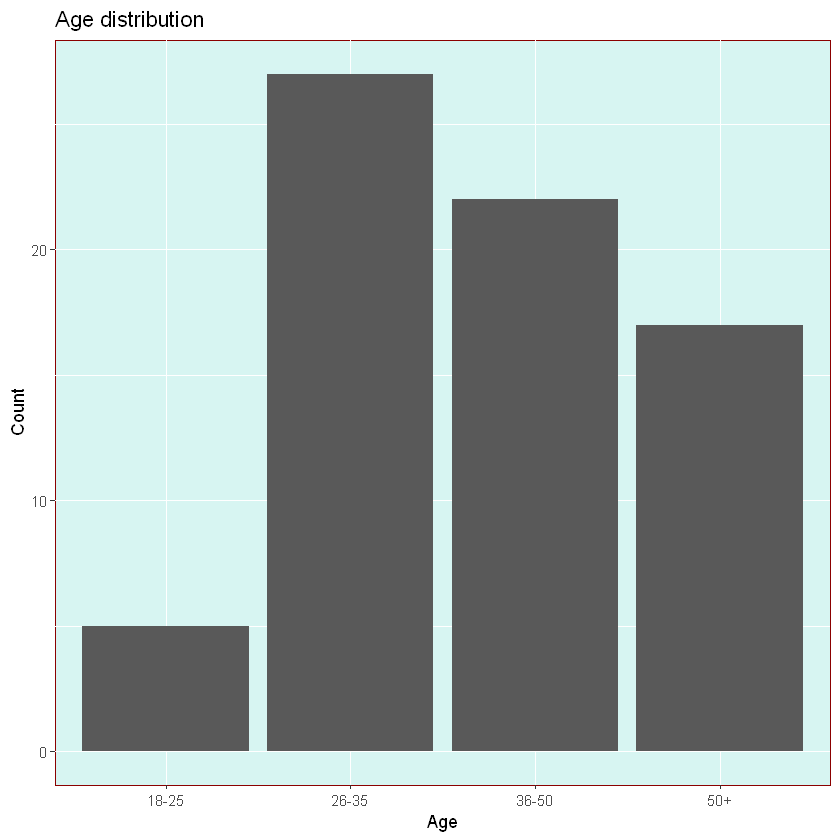

In [6]:
df <- data.frame(Age = c("18-25", "26-35", "36-50", "50+"), Count = c(data$n[1], data$n[2], data$n[3], data$n[4]))
ggplot(df, aes(x = Age, y = Count)) +
  geom_col() +
    ggtitle("Age distribution")  + 
    theme( panel.background = element_rect(fill = '#d7f5f2', colour = 'darkred'), strip.background = element_rect(fill='#d7f5f2'),
              strip.text = element_text(size=15, colour='darkred')) 